# Regresión logística.

## Aprendizaje supervisado: regresión vs. clasificación

### Regresión:
- Valor de una propiedad
- Cotización de una determinada acción en un mercado
- Cantidad de productos comprados

### Clasificación:
- Email: spam/no spam
- Tweet: positivo/negativo
- Alumno: aprueba/desaprueba

#### Por convención: 1/0

In [2]:
%matplotlib inline
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
def plot_dataset():
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    fig.suptitle('Es setosa?')
    ax.scatter(data.petal_length, data.es_setosa)
    ax.set_xlabel('Largo del pétalo')
    ax.set_ylabel('clase')
    ax.set_ylim(-0.1, 1.1)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

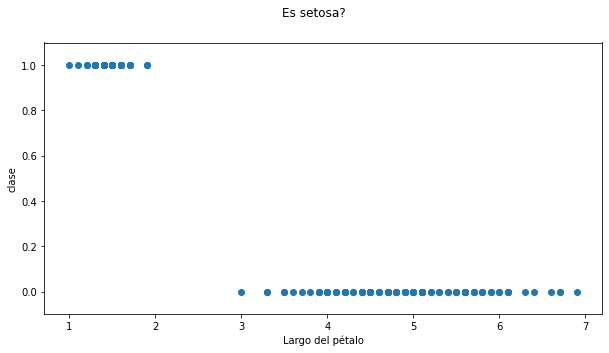

In [6]:
iris = datasets.load_iris()

data = pd.DataFrame(iris.data, 
                    columns=[x[:-5].replace(' ', '_') for x in iris.feature_names])
features = data.columns
data['target'] = iris.target
display(iris.target_names)
data['target_name'] =  data.target.map(dict(enumerate(iris.target_names)))
data['es_setosa'] = data.target==0
# display(data.columns)
plot_dataset()

In [7]:
def plot_uni_var(model):
    x = np.linspace(0, 8, num=200)
    predictions = model.predict(x.reshape(-1, 1))
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    fig.suptitle('Es setosa?')
    ax.scatter(data.petal_length, data.es_setosa)
    ax.plot(x, predictions, c='r')
    ax.set_xlabel('Largo del pétalo')
    ax.set_ylabel('clase')
    ax.set_ylim(-0.1, 1.1)

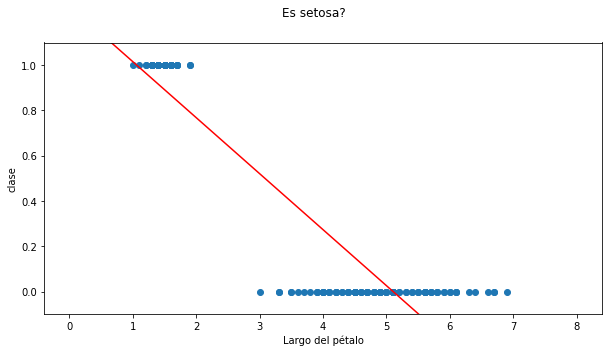

In [8]:
linear_regression = LinearRegression().fit(data[['petal_length']], data.es_setosa)
plot_uni_var(linear_regression)

* Las salidas no se limitan a los valores buscados
* El agregado de algunos puntos extremos nos mueve considerablemente la recta

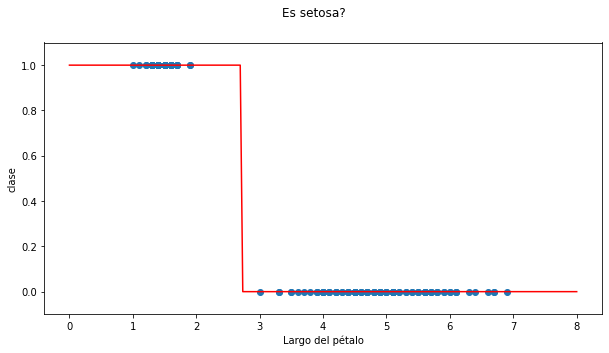

In [6]:
logistic_regression = LogisticRegression().fit(data[['petal_length']], data.es_setosa)
plot_uni_var(logistic_regression)

### Regresión logística

Queremos: $ 0 \leq h_\theta (x) \leq 1 $

#### Función sigmoide o logística

$$ f(z) = \frac{1}{(1 + e^{-z})} $$

![](files/images/sigmoid_function.png)

Antes:

$$ h_\theta = \theta^T x $$

Ahora: 

$$ h_\theta = g(\theta^Tx) $$

$$ g(z) = \frac{1}{(1 + e^{-z})} $$

Que es igual a:

$$ h_\theta = \frac{1}{(1 + e^{- \theta^T x})} $$

In [7]:
def plot_logistic(model):
    x = np.linspace(0, 8, num=200)
    predictions = model.predict_proba(x.reshape(-1, 1))[:, 1]

    fig, axis = plt.subplots(1, 2, figsize=(10, 5))
    
    ax = axis[0]
    x_0 = (-logistic_regression.intercept_ / logistic_regression.coef_[0])[0]
    ax.set_title('Recta aprendida: {:.2f} x + {:.2f} \n Intercepta X en {:.3f}'.format(
        model.coef_[0][0], model.intercept_[0], x_0
    ))
    line = model.coef_[0] * x + model.intercept_
    ax.plot(x, line, c='r')
    ax.set_xlabel('Largo del pétalo')
    ax.set_xlim(0, 5)
    ax.set_ylim(-20, 20)
    ax.grid(True)

    ax = axis[1]
    ax.set_title('Es setosa?')
    ax.scatter(data.petal_length, data.es_setosa)
    ax.plot(x, predictions, c='r')
    ax.set_xlabel('Largo del pétalo')
    ax.set_ylabel('clase')
    ax.set_xlim(0, 5)
    ax.grid(True)

    plt.tight_layout()

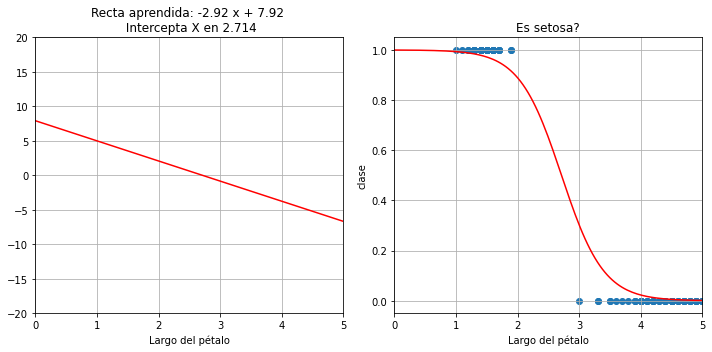

In [8]:
logistic_regression = LogisticRegression().fit(data[['petal_length']], data.es_setosa)
plot_logistic(logistic_regression)

## ¿Qué interpretación le podemos dar a esa salida numérica?

![](files/images/thinker.gif)

## ¿Qué interpretación le podemos dar a esa salida numérica?



**Podemos pensar en la salida numérica como la probabilidad de que la clase sea 1**

$$ h_\theta = P(y=1 | x; \theta) $$

$$ h_\theta = P(y=0 | x; \theta) ? $$

$$ y = 1 \rightarrow h_\theta \geq 0.5 \rightarrow \theta^Tx \geq 0 $$
$$ y = 0 \rightarrow h_\theta < 0.5 \rightarrow \theta^Tx < 0 $$

**Podemos elegir otro threshold que se adapte mejor a nuestras necesidades**

# Frontera de decisión

**Es el límite de los valores de entrada que hacen que la salida del modelo pase de ser una clase a ser otra.**

![](files/images/decision_boundary_1.png)

**No confundir frontera de decisión con la recta aprendida**

### Si:  $ \theta_0 = -3, \theta_1 = 1, \theta_2 = 1 $

#### Sabiendo que el threshold es 0.5:  $ g(-3 + x_1 + x_2) >= 0.5 $


#### Sabiendo que el resultado de sigmoid es 0.5 cuando la recta es 0: $ -3 + x_1 + x_2 >= 0 $  

#### o escrito de otra forma: $ x_1 + x_2 >= 3 $

![](files/images/decision_boundary_2.png)

# ¿Cómo aprendemos?
![](files/images/sigmoid_function_2.png)

## Optimizar $ \theta\ $ !

### Regresión lineal

$$ J(\theta) = \frac{1}{m} \sum^{m}_{i=1} \frac{1}{2} (h_\theta (x^i) - y^i)^2 $$

$$ J(\theta) = \frac{1}{m} \sum^{m}_{i=1} C(h_\theta (x^i), y^i) $$
$$ C(h_\theta (x), y) = \frac{1}{2} (h_\theta(x)-y)^2 $$

**El error cuadrático es una función poco conveniente para nuestro objetivo: no es convexa, por lo tanto presenta muchos mínimos locales.**

# Regresión logística

$ C(h_\theta (x), y) = -\log(h_\theta(x)) \qquad si \quad y = 1 $

$ \qquad \qquad \quad -\log(1-h_\theta(x)) \qquad si \quad y = 0 $

![](files/images/logs.png)

# ¿Podemos simplificar nuestra función C?

$ C(h_\theta (x), y) = -\log(h_\theta(x)) \qquad si \quad y = 1 $

$ \qquad \qquad \quad -\log(1-h_\theta(x)) \qquad si \quad y = 0 $

### Siempre trabajamos con y = 0 o y = 1, entonces ...

$$ C(h_\theta (x), y) = -y \log(h_\theta(x)) - (1-y) \log(1-h_\theta(x)) $$

Finalmente ...

$$ J(\theta) = -\frac{1}{m} [\sum^{m}_{i=1} y^i \log h_\theta(x^i) + (1-y^i)\log(1-h_\theta(x^i))]  $$

# Descenso por el gradiente

$ min_\theta \quad J(\theta): $

Repetir {

$ \quad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $

}

### Regresión lineal vs. logística

#### Regresión lineal

$$ h_\theta (x) = \theta^Tx $$
$$ C(h_\theta (x), y) = \frac{1}{2} (h_\theta(x)-y)^2 $$

#### Regresión logística

$$ h_\theta (x) = \frac{1}{1+e^{-\theta^Tx}} $$
$$ C(h_\theta (x), y) = -y \log(h_\theta(x)) - (1-y) \log(1-h_\theta(x)) $$